<a href="https://colab.research.google.com/github/MihaelaCatan04/FAF_AA_LABS/blob/main/Nth_Fibonacci_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nth Fibonacci Number

This notebook aims to implement different algorithms for computing the Nth number in the Fibonacci Sequence.

This is part of the 1st Laboratory Work for Algorithm Analysis.

The report can be found [here.](https://www.overleaf.com/read/mgggdtsmjmkz#f728ca)

In [ ]:
!pip install gradio

In [2]:
# Import some libraries
import time
import tracemalloc
import gradio as gr
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import math

In [3]:
import gradio as gr
import time
import tracemalloc
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Function to compute and plot usage
def plot_usage(max_n, func):
    times = []
    memory_usage = []

    # Time and space
    for n in range(0, max_n + 1):
        start_time = time.time()
        tracemalloc.start()
        func(n)
        end_time = time.time()
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)
        memory_usage.append(peak)

    # Plot time usage
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, max_n + 1), times, color='blue', label='Time Usage')
    plt.title("Time Usage")
    plt.xlabel("n")
    plt.ylabel("Time (seconds)")
    plt.xticks(range(0, max_n + 1))
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune="both"))
    plt.legend()
    time_plot_path = "time_usage_plot.png"
    plt.tight_layout()
    plt.savefig(time_plot_path)
    plt.close()

    # Plot memory usage
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, max_n + 1), memory_usage, color='red', label='Memory Usage')
    plt.title("Memory Usage")
    plt.xlabel("n")
    plt.ylabel("Memory (bytes)")
    plt.xticks(range(0, max_n + 1))
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune="both"))
    plt.legend()
    memory_plot_path = "memory_usage_plot.png"
    plt.tight_layout()
    plt.savefig(memory_plot_path)
    plt.close()

    # Return the last value for time and memory at max_n
    last_time = times[-1]
    last_memory = memory_usage[-1]

    # Return last values along with plot paths
    return f"Time at n={max_n}: {last_time:.6f} seconds", f"Memory at n={max_n}: {last_memory:.6f} bytes", time_plot_path, memory_plot_path


    # Return both plot paths
    return time_plot_path, memory_plot_path

*P.S: Timing functions for very small n like 0 and 1 can be tricky because they execute so quickly that even small background processes or measurement overhead can cause inaccurate or inconsistent results.*

‼️Disclaimer

In this code, the Fibonacci Sequence starts with 0. Eg. 0, 1, 1, 2, 3, 5, 8, 13, ... .


Also, the indexing will be from 1, so the element 0 will have index 1, element 1 will have index 2, element 1 will have index 3, element 2 will have index 4 and so on.

# Approach #1: Using Recursion

In [ ]:
# Recursive implementation
def fibonacci_recursive(n):
  if n <= 1:
    return n
  else:
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

In [ ]:
position = int(input("Please input the Nth position: "))
if position > 0:
  print(fibonacci_recursive(position-1))
else:
  raise ValueError("Position should be bigger than 0!")

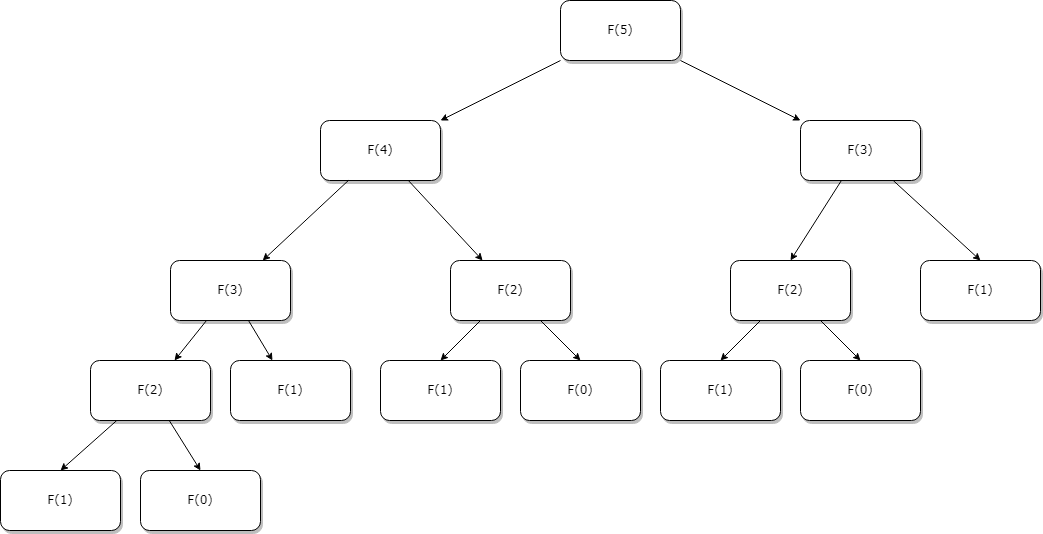

**Time complexity:** O(2^n)

**Space complexity:** O(n)

In [ ]:
# Gradio interface for fibonacci_recursive
gui = gr.Interface(
    fn=lambda n: plot_usage(n, fibonacci_recursive),
    inputs=gr.Slider(minimum=1, maximum=100, step=1, label="Select max n for Fibonacci"),
    outputs=[
        gr.Textbox(label="Time Usage Value", interactive=False),
        gr.Textbox(label="Memory Usage Value", interactive=False),
        gr.Image(label="Time Usage Plot"),
        gr.Image(label="Memory Usage Plot")
    ],
    title="Fibonacci Usage Visualization"
)

gui.launch()

# Approach #2: Bottom-Up Algorithm

In [ ]:
# Bottom-Up Implementation
def fibonacci_bottom_up(n):
  if n == 0 or n == 1:
    return n
  else:
    values = np.zeros(n + 1, dtype=int)
    values[0], values[1] = 0, 1
    for i in range(2, n+1):
      values[i] = values[i-1] + values[i-2]
    return values[n]

In [ ]:
position = int(input("Please input the Nth position: "))
if position > 0:
  print(fibonacci_bottom_up(position-1))
else:
  raise ValueError("Position should be bigger than 0!")

**Time complexity:** O(n)

**Space complexity:** O(n)

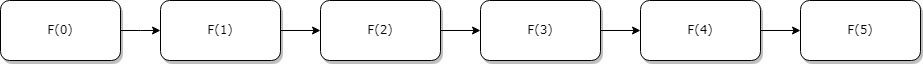

In [ ]:
# Gradio interface for fibonacci_bottom_up
gui = gr.Interface(
    fn=lambda n: plot_usage(n, fibonacci_bottom_up),
    inputs=gr.Slider(minimum=1, maximum=10000, step=1, label="Select max n for Fibonacci"),
    outputs=[
        gr.Textbox(label="Time Usage Value", interactive=False),
        gr.Textbox(label="Memory Usage Value", interactive=False),
        gr.Image(label="Time Usage Plot"),
        gr.Image(label="Memory Usage Plot")
    ],
    title="Fibonacci Usage Visualization"
)

gui.launch(debug=True)

#Approach #3: Top-Down Algorithm

In [ ]:
# Top-Down Implementation
def fibonacci_top_down(n, values):
  if n == 0 or n == 1:
    return n
  elif values[n] != 0:
    return values[n]
  else:
    values[n] = fibonacci_top_down(n - 1, values) + fibonacci_top_down(n - 2, values)
    return values[n]

In [ ]:
# Helper Function for Top-Down Implementation
def fibonacci_top_down_helper(n):
  values = np.zeros(n + 1, dtype=int)
  return fibonacci_top_down(n, values)

In [ ]:
position = int(input("Please input the Nth position: "))
if position > 0:
  print(fibonacci_top_down_helper(position-1))
else:
  raise ValueError("Position should be bigger than 0!")

**Time complexity:** O(n)

**Space complexity:** O(n)

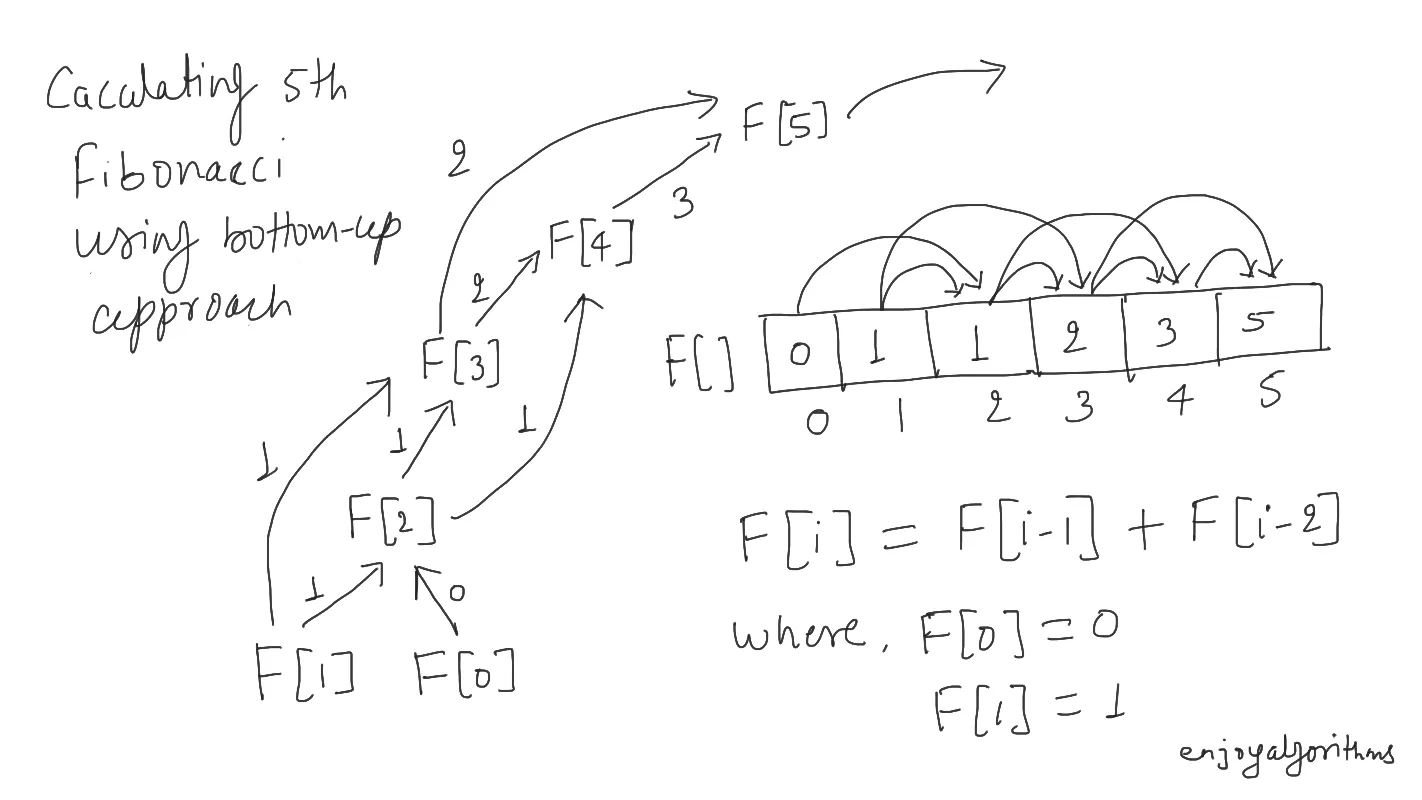

In [ ]:
# Modify the recursion limit
import sys

sys.setrecursionlimit(10**6)

In [ ]:
# Gradio interface for fibonacci_top_down_helper
gui = gr.Interface(
    fn=lambda n: plot_usage(n, fibonacci_top_down_helper),
    inputs=gr.Slider(minimum=1, maximum=10000, step=1, label="Select max n for Fibonacci"),
    outputs=[
        gr.Textbox(label="Time Usage Value", interactive=False),
        gr.Textbox(label="Memory Usage Value", interactive=False),
        gr.Image(label="Time Usage Plot"),
        gr.Image(label="Memory Usage Plot")
    ],
    title="Fibonacci Usage Visualization"
)

gui.launch(debug=True)

#Approach #4: Space Optimized Algorithm

In [4]:
# Space Optimized Implementation
def fibonacci_space_optimized(n):
  if n == 0 or n == 1:
    return n
  else:
    a, b = 0, 1
    for i in range(2, n+1):
      temp = a + b
      a = b
      b = temp
    return b

In [ ]:
position = int(input("Please input the Nth position: "))
if position > 0:
  print(fibonacci_space_optimized(position-1))
else:
  raise ValueError("Position should be bigger than 0!")

Please input the Nth position: 5


**Time complexity:** O(n)

**Space complexity:** O(1)

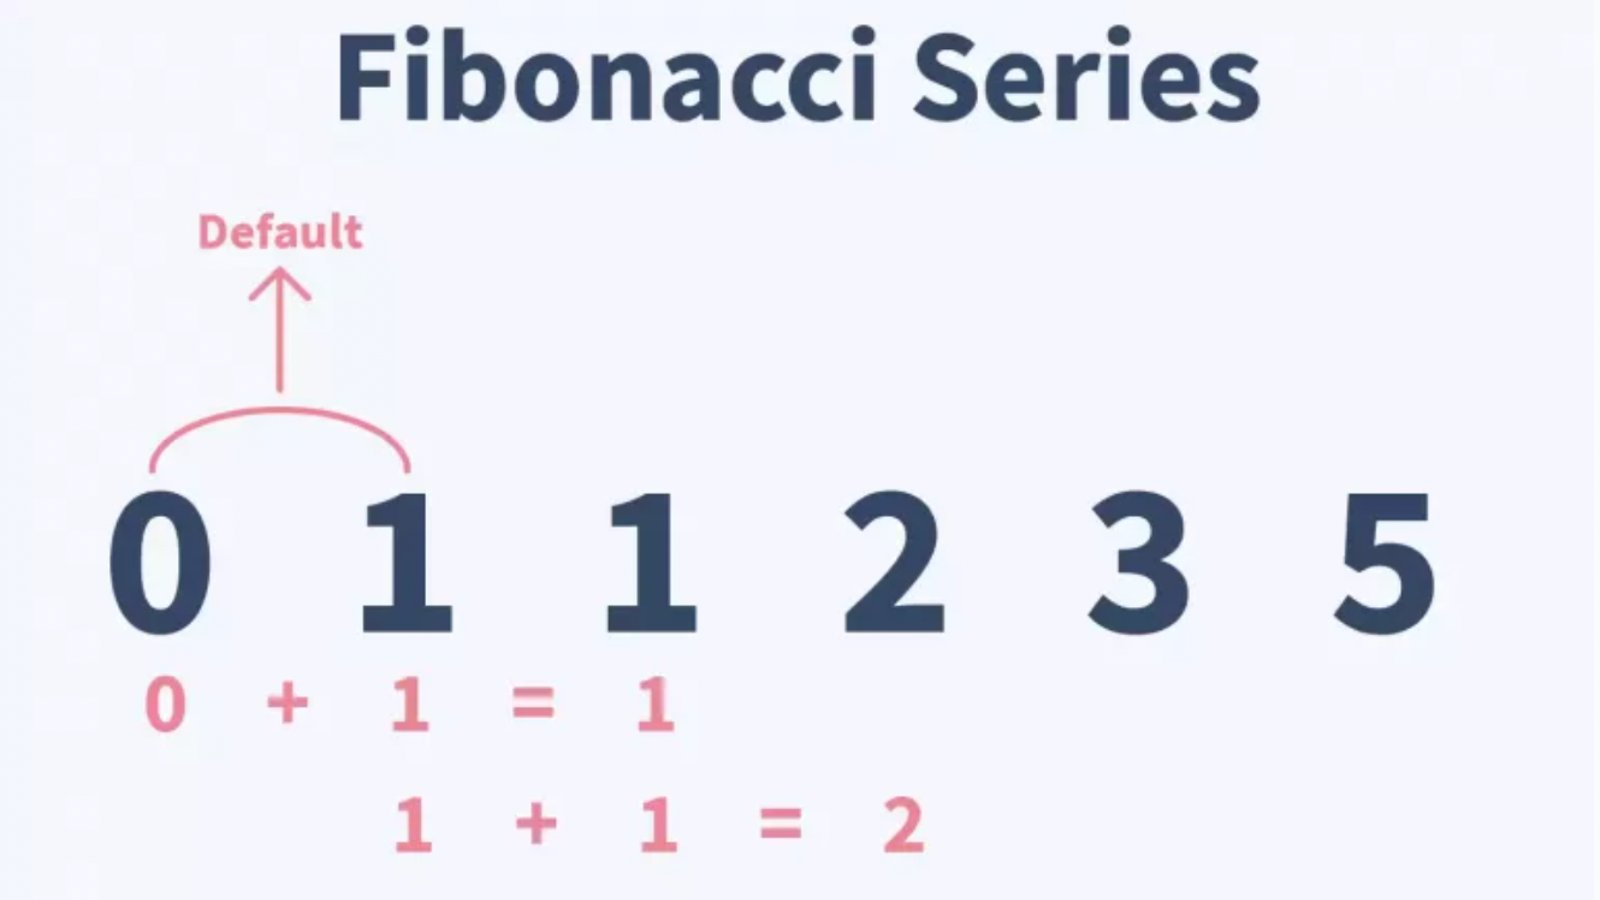

In [ ]:
# Gradio interface for fibonacci_space_optimized
gui = gr.Interface(
    fn=lambda n: plot_usage(n, fibonacci_space_optimized),
    inputs=gr.Slider(minimum=1, maximum=10000, step=1, label="Select max n for Fibonacci"),
    outputs=[
        gr.Textbox(label="Time Usage Value", interactive=False),
        gr.Textbox(label="Memory Usage Value", interactive=False),
        gr.Image(label="Time Usage Plot"),
        gr.Image(label="Memory Usage Plot")
    ],
    title="Fibonacci Usage Visualization"
)

gui.launch(debug=True)

#Approach #5: Matrix Exponentiation Algorithm

In [6]:
# Helper function for Matrix Exponentiation Implementation
def raise_power(mat, n):
  if n == 1:
    return mat
  elif n % 2 == 0:
    half_power = raise_power(mat, n // 2)
    return np.dot(half_power, half_power)
  else:
    half_power = raise_power(mat, (n - 1) // 2)
    return np.dot(np.dot(half_power, half_power), mat)

In [7]:
# Matrix Exponentiation Implementation
def fibonacci_matrix_exponentation(n):
  if n == 0 or n == 1:
    return n
  else:
    mat = np.array([[1, 1], [1, 0]])
    result = raise_power(mat, n - 1)
  return result[0][0]

In [ ]:
position = int(input("Please input the Nth position: "))
if position > 0:
  print(fibonacci_matrix_exponentation(position-1))
else:
  raise ValueError("Position should be bigger than 0!")

**Time complexity:** O(log n)

**Space complexity:** O(log n)

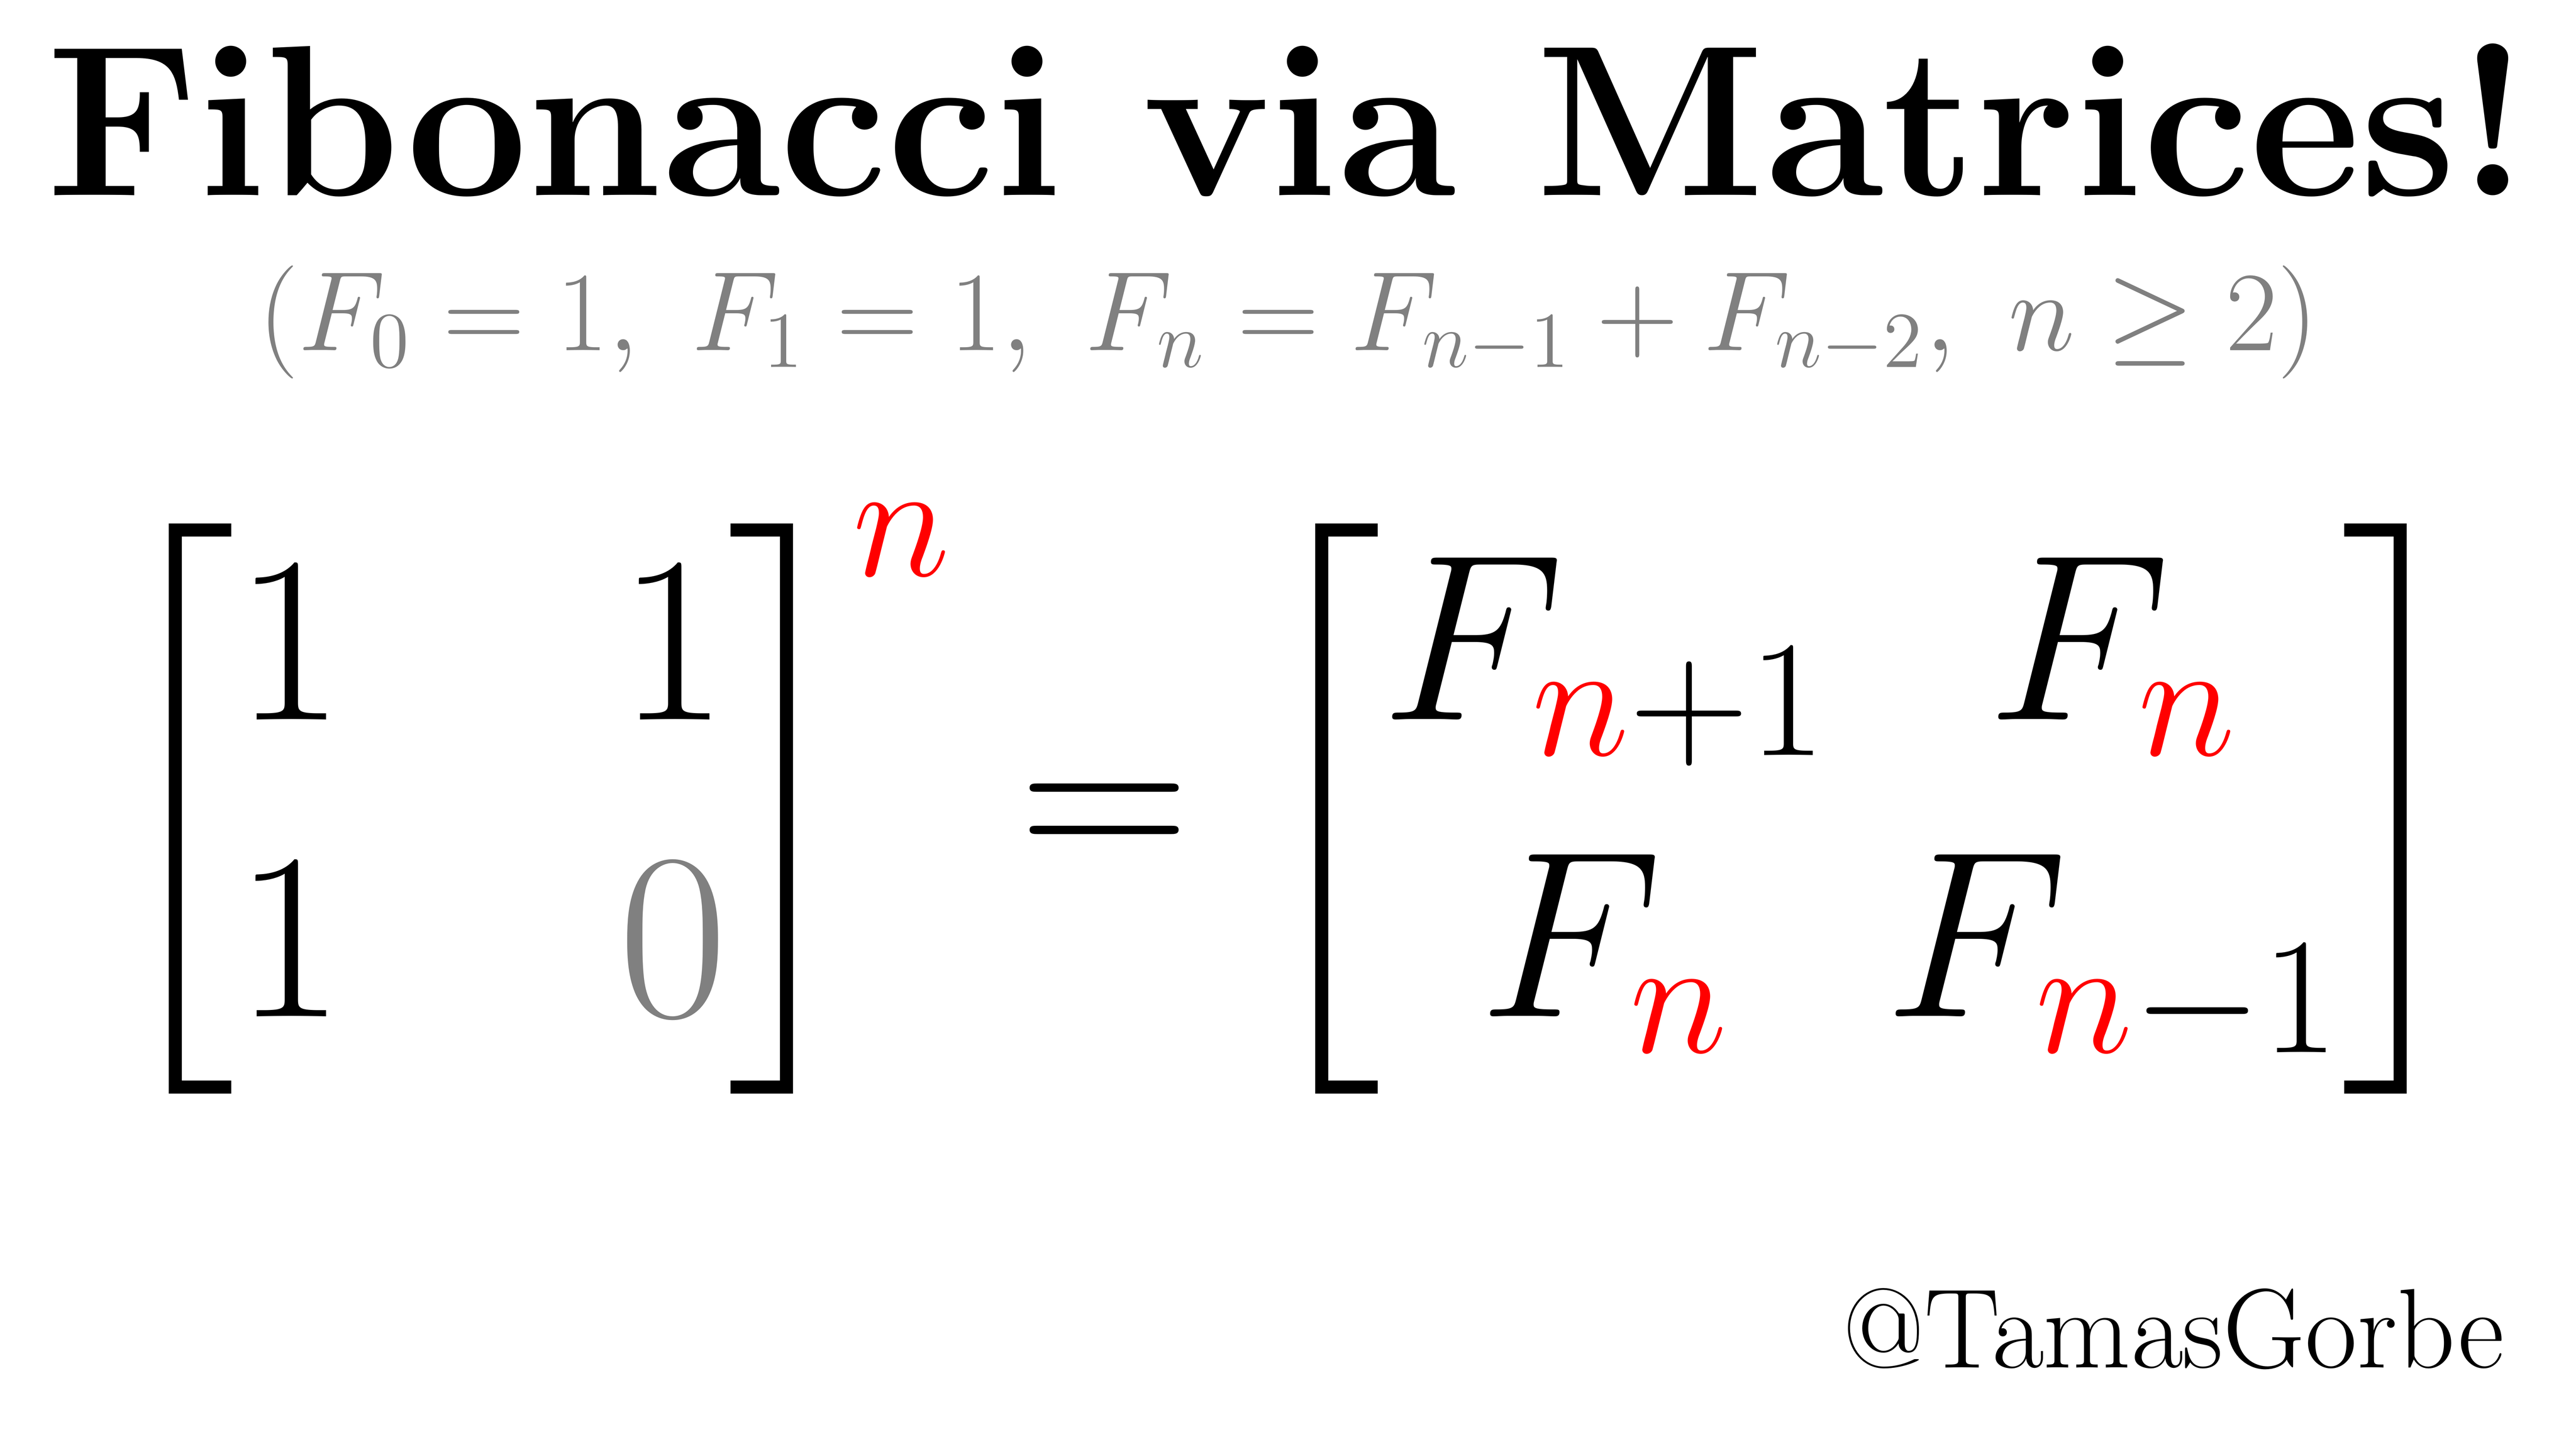

In [ ]:
# Gradio interface for fibonacci_matrix_exponentation
gui = gr.Interface(
    fn=lambda n: plot_usage(n, fibonacci_matrix_exponentation),
    inputs=gr.Slider(minimum=1, maximum=10000, step=1, label="Select max n for Fibonacci"),
    outputs=[
        gr.Textbox(label="Time Usage Value", interactive=False),
        gr.Textbox(label="Memory Usage Value", interactive=False),
        gr.Image(label="Time Usage Plot"),
        gr.Image(label="Memory Usage Plot")
    ],
    title="Fibonacci Usage Visualization"
)

gui.launch(debug=True)

#Approach #6: Golden Ratio Algorithm

In [9]:
# Constants
phi = (1 + math.sqrt(5)) / 2
sequence = [0, 1, 1, 2, 3, 5]

In [10]:
# Golden Ratio Implementation
def fibonacci_golden_ratio(n):
  if n < 6:
    return sequence[n]
  else:
    indx = 5
    value = sequence[indx]
    while indx < n:
      value = round(value * phi)
      indx += 1
    return value

In [ ]:
position = int(input("Please input the Nth position: "))
if position > 0:
  print(fibonacci_golden_ratio(position-1))
else:
  raise ValueError("Position should be bigger than 0!")

**Time complexity:** O(n)

**Space complexity:** O(1)

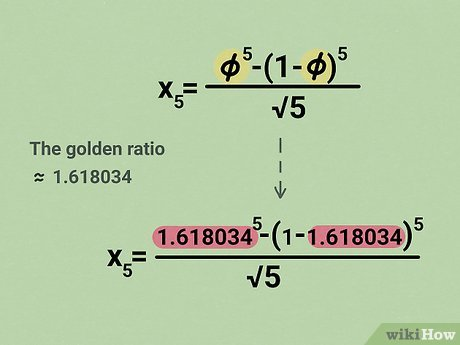

In [ ]:
# Gradio interface for fibonacci_golden_ratio
gui = gr.Interface(
    fn=lambda n: plot_usage(n, fibonacci_golden_ratio),
    inputs=gr.Slider(minimum=1, maximum=10000, step=1, label="Select max n for Fibonacci"),
    outputs=[
        gr.Textbox(label="Time Usage Value", interactive=False),
        gr.Textbox(label="Memory Usage Value", interactive=False),
        gr.Image(label="Time Usage Plot"),
        gr.Image(label="Memory Usage Plot")
    ],
    title="Fibonacci Usage Visualization"
)

gui.launch(debug=True)

# Approach #7: Fast Doubling Algorithm

In [12]:
# Fast Doubling Implementation
def fibonacci_fast_doubling(n):
  if n == 0:
    return (0, 1)
  else:
    a, b = fibonacci_fast_doubling(n // 2)
    c = a * (b * 2 - a)
    d = a * a + b * b
    if n % 2 == 0:
      return (c, d)
    else:
      return (d, c + d)

In [13]:
# Helper Function for Fast Doubling Implementation
def fibonacci_fast_doubling_helper(n):
  return fibonacci_fast_doubling(n)[0]

In [ ]:
position = int(input("Please input the Nth position: "))
if position > 0:
  print(fibonacci_fast_doubling_helper(position-1))
else:
  raise ValueError("Position should be bigger than 0!")

**Time complexity:** O(log n)

**Space complexity:** O(log n)

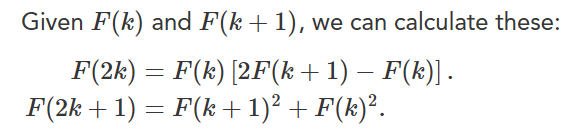

In [ ]:
# Gradio interface for fibonacci_fast_doubling
gui = gr.Interface(
    fn=lambda n: plot_usage(n, fibonacci_fast_doubling),
    inputs=gr.Slider(minimum=1, maximum=10000, step=1, label="Select max n for Fibonacci"),
    outputs=[
        gr.Textbox(label="Time Usage Value", interactive=False),
        gr.Textbox(label="Memory Usage Value", interactive=False),
        gr.Image(label="Time Usage Plot"),
        gr.Image(label="Memory Usage Plot")
    ],
    title="Fibonacci Usage Visualization"
)

gui.launch(debug=True)

# Approach #8: Binet's Approximation Algorithm

In [15]:
# Binet's Approximation Implementation
def fibonacci_binets_approximation(n):
  if n == 0 or n == 1:
    return n
  else:
    phi = (1 + math.sqrt(5)) / 2
    return math.floor(math.pow(phi, n) / math.sqrt(5) + 0.5)

In [ ]:
position = int(input("Please input the Nth position: "))
if position > 0:
  print(fibonacci_binets_approximation(position-1))
else:
  raise ValueError("Position should be bigger than 0!")

**Time complexity:** O(log n) (due to the pow function)

**Space complexity:** O(1)

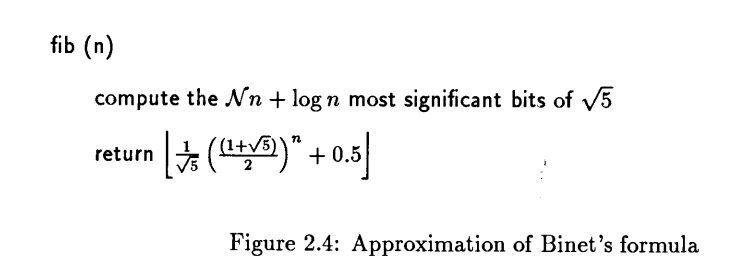

In [ ]:
# Gradio interface for fibonacci_binets_approximation
gui = gr.Interface(
    fn=lambda n: plot_usage(n, fibonacci_binets_approximation),
    inputs=gr.Slider(minimum=1, maximum=10000, step=1, label="Select max n for Fibonacci"),
    outputs=[
        gr.Textbox(label="Time Usage Value", interactive=False),
        gr.Textbox(label="Memory Usage Value", interactive=False),
        gr.Image(label="Time Usage Plot"),
        gr.Image(label="Memory Usage Plot")
    ],
    title="Fibonacci Usage Visualization"
)

gui.launch(debug=True)

# Bibliography:

https://www.baeldung.com/cs/fibonacci-top-down-vs-bottom-up-dynamic-programming

https://medium.com/enjoy-algorithm/top-down-vs-bottom-up-approach-in-dynamic-programming-53b917bfbe0

https://x.com/TamasGorbe/status/1581232316268978176?lang=hi&mx=2

https://www.geeksforgeeks.org/find-nth-fibonacci-number-using-golden-ratio/

https://www.nayuki.io/page/fast-fibonacci-algorithms

https://ir.library.oregonstate.edu/downloads/t435gg51w
